In [1]:
#Technical Stock Analysis Made Easy in Python
import datetime as dt
import talib as ta
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
import mplfinance as mpf
from pandas_datareader import data as pdr
import yfinance as yf
from datetime import datetime

In [12]:
yf.pdr_override()

In [13]:
#Getting the stock data
data = pdr.get_data_yahoo("AAPL", start="2012-1-1", end="2022-12-24")

data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.519279,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.586559,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.726292,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.859334,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.838935,394024400
...,...,...,...,...,...,...
2022-12-19,135.110001,135.199997,131.320007,132.369995,132.369995,79592600
2022-12-20,131.389999,133.250000,129.889999,132.300003,132.300003,77432800
2022-12-21,132.979996,136.809998,132.750000,135.449997,135.449997,85928000


In [14]:
#Calculating the SMA 
data["SMA_100"] = ta.SMA(data["Close"], 100)

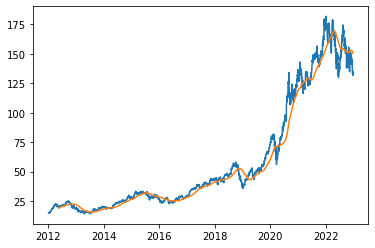

In [15]:
#Displaying the data
plt.plot(data["Close"])
plt.plot(data["SMA_100"])

In [16]:
#Calculating the EMA
data["EMA_100"] = ta.EMA(data["Close"], 100)

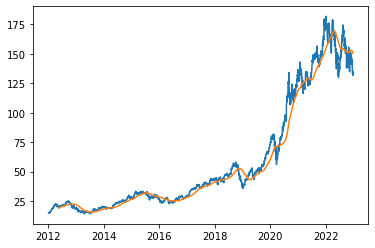

In [17]:
#Displaying the data
plt.plot(data["Close"])
plt.plot(data["SMA_100"])

In [18]:
#Calculating the Relative Strenght Index
data["RSI"] = ta.RSI(data["Close"])

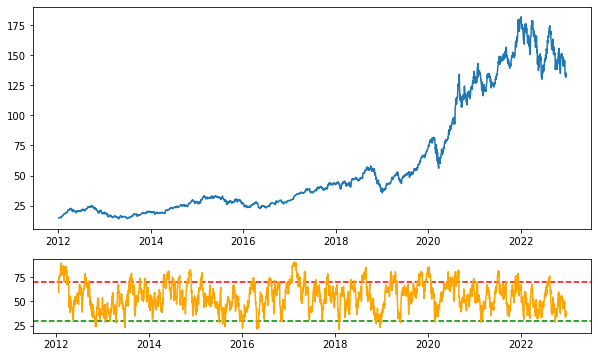

In [19]:
#Displaying the data
fig, axs = plt.subplots(2, 1, gridspec_kw={"height_ratios": [3, 1]}, figsize=(10, 6))
axs[0].plot(data["Close"])
axs[1].axhline(y=70, color="r", linestyle="--")
axs[1].axhline(y=30, color="g", linestyle="--")
axs[1].plot(data["RSI"], color="orange")

In [20]:
#Calculating the Linear Regretion
data["LINEARREG"] = ta.LINEARREG(data["Close"], 200)

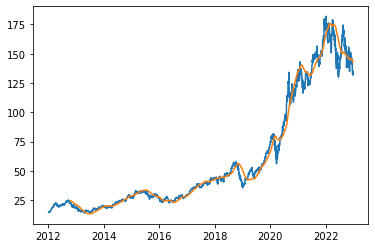

In [21]:
#Displaying the data
plt.plot(data["Close"])
plt.plot(data["LINEARREG"])

In [23]:
#Calculating the MACD

#Getting the data on the right time frame
start = dt.datetime(2012, 1, 1)
end = dt.datetime.now()

data = pdr.get_data_yahoo("AAPL", start, end)
macd, macd_signal, macd_hist = ta.MACD(data["Close"])

[*********************100%***********************]  1 of 1 completed


<BarContainer object of 2764 artists>

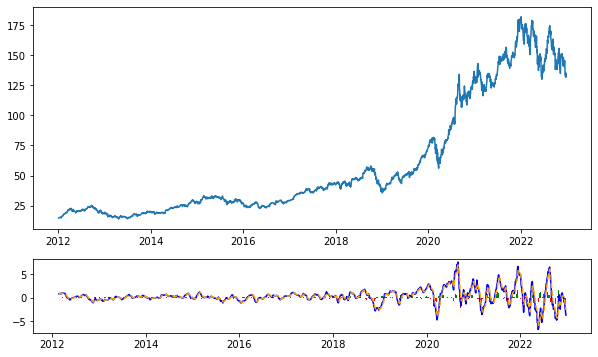

In [24]:
#Displaying the data
fig, axs = plt.subplots(2, 1, gridspec_kw={"height_ratios": [3, 1]}, figsize=(10, 6))
c = ["red" if cl < 0 else "green" for cl in macd_hist]

axs[0].plot(data["Close"])
axs[1].plot(macd, "b-")
axs[1].plot(macd_signal, "--", color="orange")
axs[1].bar(macd_hist.index, macd_hist, color=c)

In [27]:
#Creating a pattern for a trend if bullish or bearish
start = dt.datetime(2012, 1, 1)
end = dt.datetime.now()

data = pdr.get_data_yahoo("AAPL", start, end)

[*********************100%***********************]  1 of 1 completed


In [28]:
#Displaying the data
data["ENGULFING"] = ta.CDLENGULFING(data["Open"], data["High"], data["Low"], data["Close"])

C:\Users\Joao\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


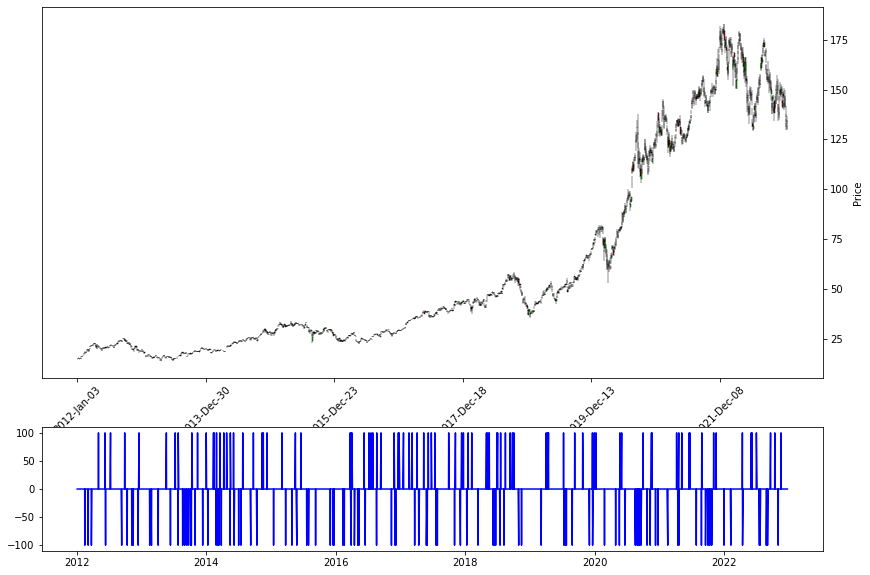

In [32]:
#Displaying the data in candles
fig, axs = plt.subplots(2, 1, gridspec_kw={"height_ratios": [3, 1]}, figsize=(14, 10))
colors = mpf.make_marketcolors(up="#00ff00", down="#ff0000")
mpf_style = mpf.make_mpf_style(base_mpf_style="yahoo", marketcolors=colors)

mpf.plot(data, type="candle", ax=axs[0], style=mpf_style)
axs[1].plot(data["ENGULFING"], color="blue")